# PyTorch 101

### Mια εισαγωγή στο PyTorch.

To [PyTorch](https://pytorch.org/) είναι ένα open source machine learning framework που χρησιμοποιείται τόσο από την ερευνητική κοινότητα όσο και από εταιρείες κατασκευής λογισμικού μηχανική μάθησης. Μας παρέχει πολλές έτοιμες υλοποιήσεις και μας επιτρέπει να χτίζουμε με ευελιξία νέες αρχιτεκτονικές ώστε να τις εκπαιδεύσουμε. Επίσης παρέχει αυτόματο μηχανισμό διαφόρισης και συνεπώς δεν χρειάζεται να υπολογίζουμε με αναλυτικό τρόπο τις παραγώγους. Τέλος είναι συμβατό με GPUs,  δηλαδή hardware το οποίο είναι dedicated στις γρήγορες πράξεις μεταξύ πινάκων.

# Ενοτητα 1: Tensors

Από καθαρά μαθηματικής άποψης οι τανυστές είναι μεγέθη που ορίζονται από τις τιμές ενός αριθμού συνιστωσών, οι οποίες με τη σειρά τους αναφέρονται σε ένα σύστημα συντεταγμένων. O αριθμός των συνιστωσών του τανυστή προσδιορίζει και την τάξη του. Αν για παραάδειγμα αναφερόμαστε στον Ευκλείδιο τρσιδιάστατο χώρο, τότε μπορούμε να πούμε πως
- ο τανυστής μηδενικής τάξης (rank) έχει μία συνιστώσα (scalar, βαθμωτό μέγεθος)
- ο τανυστής πρώτης τάξης έχει 3 συνιστώσες (vector)
- o τανυστής δευτέρας τάξης έχει 9 συνιστώσες (3x3 matrix)
- ...

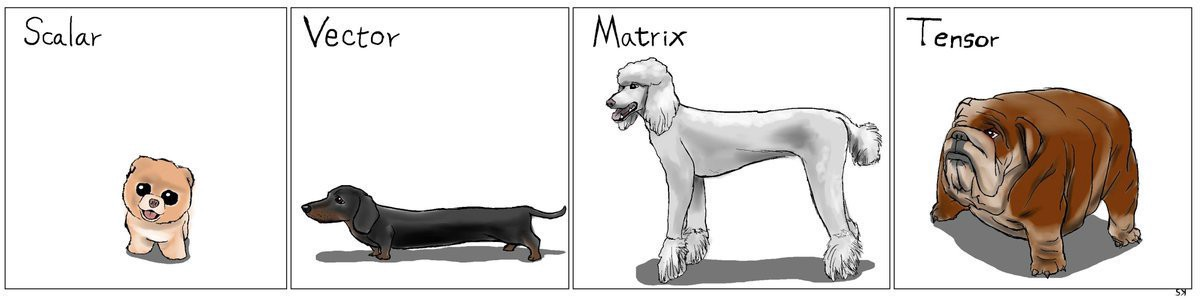


---
**Χωρίς μαθηματική αυστηρότητα μπορούμε να πούμε πως tensor είναι ένας πολυδιάστατος πίνακας.** Το PyTorch λοιπόν διαχειρίζεται τέτοιες οντότητες για να μοντελοποιεί όλες τις συνιστώσες ενός ML pipeline. Mια εύλογη ερώτηση είναι γιατί να μη χρησιμοποιήσουμε `Numpy` και χρειάζεται να μάθουμε PyTorch. Η απάντηση είναι πως η βιβλιοθήκη Numpy είναι για scientific calculations και έννοιες όπως computation graphs, gradients και deep learning δεν έχουν καμία σχέση με τη γενικού σκοπού χρήση της numpy.

---


In [5]:
import torch
import torch.nn as nn
import numpy as np

a_nn = torch.randn(2,3)
a_np = np.random.randn(2,3)

print(f"PyTorch's tensor is \n {a_nn} \n while Numpy's array is \n {a_np}")

PyTorch's tensor is 
 tensor([[ 0.0322, -0.4923, -0.3748],
        [ 1.0968, -1.0038, -0.4503]]) 
 while Numpy's array is 
 [[ 1.55687998 -1.70636988 -1.70109704]
 [-0.89354305  0.07952439  0.99915342]]


# Ενότητα 2: Το βασικό ML-pipeline

ΣΤην ενότητα αυτή περιγράφουμε τα βασικά χαρακτηριστικά ενός ML-pipeline. Συγκεκριμένα τα βασικά "συστατικά" είναι τα ακόλουθα:

- **Data**: Τα δεδομένα του προβλήματος. Πρέπει να σημειωθεί πως συνήθως χρειάζεται κάποια προεπεξεργασία των δεδομένων προκειμένου να έρθουν σε μια μορφή η οποία ενδεχομένως είναι πιο κατανοητή από το υπόλοιπο pipeline. Η διαδικασία αυτή μπορεί να περιλαμβάνει κάποια κανονικοποίηση ή κάποιο απλό μετασχηματισμό πάνω στα δεδομένα είτε να χρειάζεται μια διαδικασία η οποία ονομάζεται feature extraction. Αυτό που τελικά θα χρησιμοποιούμε είναι τα λεγόμενα features τα οποία συνήθως συμβολίζονται ως $\mathcal{X} \in \mathbb{R}^{n \times m}$, όπου $n$ το πλήθος των δειγμάτων του συνόλου δεδομένων και $m$ το πλήθος των features.

- **[Dataloader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)** Ο dataloader είναι μια κλάση του pytorch η οποία μας παρέχει έτοιμες συναρτήσεις προκειμένου να φορτώνουμε τα δεδομένα μας.
- **Model** Η αρχιτεκτονική του δικτύου που θα χρησιμοποιήσουμε ώστε να λύσουμε το πρόβλημα μας. Η αρχιτεκτονική εξαρτάται σε μεγάλο βαθμό από τη φύση του υπό εξέταση προβλήματος. Το pytorch μας παρέχει έτοιμες υλοποιήσεις για όλα τα δομικά "layers", π.χ `nn.Linear()`, `nn.Conv2D()`, `nn.LSTM()`.
- **[Loss Function](https://pytorch.org/docs/stable/nn.html#loss-functions)** Η συνάρτηση κόστους ή σφάλματος είναι επί της ουσίας ο τρόπος με τον οποίο ποσοτικοποιούμε το σφάλμα. Δηλαδή είναι η συνάρτηση μέσω της οποίας μετράμε πόσο απέχει η πρόβλεψη του δικτύου από την επιθυμητή. Το pytorch μας παρέχει έτοιμες συνρτήσεις κόστους όπως `nn.MSELoss()`, `nn.CrossEntropyLoss()` κλπ
- **Gradients** Το πως θα ανανεώσουμε τις learnable παραμέτρους του δικτύου βασίσζεται στον αλγόριθμο backpropagation ο οποίος χρησιμοποιεί τις παραγώγους του σφάλματος ως προς τις παραμέτρους του δικτύου. Σε αντίθεση με το forward pass το οποίο μας δίνει την πρόβλεψη, το backward pass υπολογίζει τις παραγώγους του δικτύου με βάση τον κανόνα της αλυσίδας.
- **[Optimizer](https://pytorch.org/docs/stable/optim.html)** Επί της ουσίας η εκπαίδευση ενός δικτύου μπορεί να γραφεί φορμαλιστικά ως ένα πρόβλημα βελτιστοποίησης. Για να επιλυθεί αυτό το πρόβλημα, δηλαδή να βρούμε τις τιμές εκείνες των παραμέτρων που ελαχιστοποιούν το σφάλμα (όπως αυτό ποσοτικοποιείται από τη συνάρτηση κοστους) χρησιμοποιούμε μια επαναληπτική διαδικασία η οποία ονομάζεται στοχαστική κατάβαση κλίσης. Τροποποιήσεις του αλγορίθμου μας παρέχονται από το PyTorch ως `torch.optim.SGD()`, `torch.optim.Adam()`

# Ενότητα 3:  PyTorch vs Numpy


Παρακάτω παραθέτουμε τις υλοποιήγσεις σε `Numpy` και `PyTorch` για ένα δίκτυο του οποίου η αρχιτεκτονική εκφράζεται από τη συνάρτηση:
$$
\hat{y} = W_2 ReLU(W_1x)
$$
δηλαδή αποτελείται από ένα γραμμικό μετασχηματισμό $W_1$ που ακολουθείται από μια μη-γραμμικότητα της μορφής $max\{0, x\}$, η έξοδος της οποίας μετασχηματίζεται επιπλέον από τον πίνακα $W_2$ στην τελική πρόβλεψη του δικτύου $\hat{y}$.

H συνάρτηση κόστους που θα χρησιμοποιήσουμε είναι το μέσο τετραγωνικό σφάλμα (MSE) δηλαδή $\mathcal{L} = \|y-\hat{y}\|^2$.

Η ανανέωση των βαρών γίνεται μέσω του κανόνα $w_{k+1} = w_k - \eta \nabla \mathcal{J}(w_{k})$

In [ ]:
import numpy as np
import tqdm
import torch
import torch.nn as nn

def train_numpy(iters=500):

  # N is batch size; D_in is input dimension;
  # H is hidden dimension; D_out is output dimension.
  N, D_in, H, D_out = 64, 1000, 100, 10

  # Create random input and output data
  x = np.random.randn(N, D_in)
  y = np.random.randn(N, D_out)

  # Randomly initialize weights
  w1 = np.random.randn(D_in, H)
  w2 = np.random.randn(H, D_out)

  learning_rate = 1e-6
  for t in range(iters):
      # Forward pass: compute predicted y
      h = x.dot(w1) # apply W_1
      h_relu = np.maximum(h, 0) # apply ReLU
      y_pred = h_relu.dot(w2) # apply W_2 

      # Compute and print loss
      # MSE custom loss
      loss = np.square(y_pred - y).sum()
      print(t, loss)

      # Backprop to compute gradients of w1 and w2 with respect to loss
      grad_y_pred = 2.0 * (y_pred - y) # grad wrt y
      grad_w2 = h_relu.T.dot(grad_y_pred) # grad wrt w2
      grad_h_relu = grad_y_pred.dot(w2.T) # apply chain rule to get grad wrt relu output
      grad_h = grad_h_relu.copy()
      grad_h[h < 0] = 0 # mask where relu is equal to zero during forward pass
      grad_w1 = x.T.dot(grad_h) # grad wrt w1

      # Update weights (SGD)
      w1 -= learning_rate * grad_w1
      w2 -= learning_rate * grad_w2

def train_pytorch_dummy(device="cpu", iters=500):
  dtype = torch.float
  device = torch.device(device)

  # N is batch size; D_in is input dimension;
  # H is hidden dimension; D_out is output dimension.
  N, D_in, H, D_out = 64, 1000, 100, 10

  # Create random Tensors to hold input and outputs.
  # Setting requires_grad=False indicates that we do not need to compute gradients
  # with respect to these Tensors during the backward pass.
  x = torch.randn(N, D_in, device=device, dtype=dtype)
  y = torch.randn(N, D_out, device=device, dtype=dtype)

  # Create random Tensors for weights.
  # Setting requires_grad=True indicates that we want to compute gradients with
  # respect to these Tensors during the backward pass.
  w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
  w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

  learning_rate = 1e-6
  for t in range(iters):
      # Forward pass: compute predicted y using operations on Tensors; these
      # are exactly the same operations we used to compute the forward pass using
      # Tensors, but we do not need to keep references to intermediate values since
      # we are not implementing the backward pass by hand.
      y_pred = x.mm(w1).clamp(min=0).mm(w2)

      # Compute and print loss using operations on Tensors.
      # Now loss is a Tensor of shape (1,)
      # loss.item() gets the scalar value held in the loss.
      loss = (y_pred - y).pow(2).sum()
      if t % 100 == 99:
          print(t, loss.item())

      # Use autograd to compute the backward pass. This call will compute the
      # gradient of loss with respect to all Tensors with requires_grad=True.
      # After this call w1.grad and w2.grad will be Tensors holding the gradient
      # of the loss with respect to w1 and w2 respectively.
      loss.backward()

      # Manually update weights using gradient descent. Wrap in torch.no_grad()
      # because weights have requires_grad=True, but we don't need to track this
      # in autograd.
      # An alternative way is to operate on weight.data and weight.grad.data.
      # Recall that tensor.data gives a tensor that shares the storage with
      # tensor, but doesn't track history.
      # You can also use torch.optim.SGD to achieve this.
      with torch.no_grad():
          w1 -= learning_rate * w1.grad
          w2 -= learning_rate * w2.grad

          # Manually zero the gradients after updating weights
          w1.grad.zero_()
          w2.grad.zero_()



In [ ]:
N_ITERS = 1000
%timeit train_numpy(iters=N_ITERS)

In [ ]:
%timeit train_pytorch_dummy(iters=N_ITERS)

In [ ]:
%timeit train_pytorch_dummy(device="cuda", iters=N_ITERS)

# Eνότητα 4: Hands-on

## Πρόβλημα Blob

Φορτώνουμε ένα έτοιμο σύνολο δεδομένων από τη βιβλιοθήκη sklearn

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10000, n_features=2)
%pylab inline


Populating the interactive namespace from numpy and matplotlib


Οπτικοποιούμε το σύνολο δεδομένων που μόλις φορτώσαμε

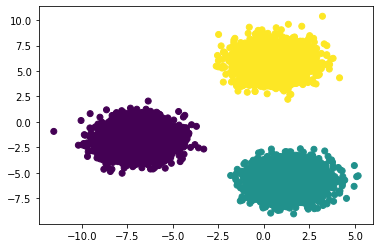

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

Για να φορτώσουμε ένα σύνολο δεδομένων στο PyTorch χρειάζεται να γράψουμε μια κλάση η οποία κληρονομεί από την `Dataset` και έχει τις ακόλουθες συναρτήσεις

- `__init__` : κάθε κλάση της python εχει μια συνάρτηση η οποί ακαλείται όταν κατασκευάζουμε έναν αντικείμενο της κλάσης
- `__len__`: επιστρέφει το μήκος του συνόλου δεδομένων
- `__getitem__`: επιστρέφει ένα στοιχείο του συνόλου δεδομένων δοθέντος ενός `idx`

In [10]:
from torch.utils.data import Dataset

class BlobData(Dataset):
    def __init__(self, X, y, trans=None):
        self.data = list(zip(X, y))
        self.trans = trans
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        if self.trans is not None:
            return self.trans(self.data[idx])
        else:
            return self.data[idx]

Στο σημέιο αυτό "πειράζουμε" το σύνολο δεδομένων που φορτώσαμε εφαρμόζοντας έναν μετασχηματισμό ο οποίος επί της ουσίας προσθέτει λευκό θόρυβο. Υπάρχει και πιο εύκολος τρόπος για να γίνει το συγκεκριμένο, όμως σκοπός του παραδείγματος είναι να δείξουεμ πως μπορούμε να εισάγουμε έναν αυθαίρετο μετασχηματισμό μέσω του PyTorch.

In [11]:
from torchvision import transforms


class GaussianNoise(object):
  """
  class which adds white noise to a given 2D data point
  """
  def __init__(self, std=0.1, mean=0.0):
      self.mean = mean
      self.std = std
        
  def __call__(self, datum):
      x, y = datum[0], datum[1]
      return x + (self.std * np.random.randn(2) + self.mean), y

class ToTensor(object):
  """converts a numpy object to a torch tensor"""
  def __init__(self):
        pass
      
  def __call__(self, datum):
      x, y = datum[0], datum[1]
      t = torch.from_numpy(x).type(torch.FloatTensor) 
      return t, y


Εφαρμόζουμε τη σύνθεση των δύο μετασχηματισμών. Δηλαδή κατασκευάζουμε έναν καινόυργιο ο οποίος θα προσθέσει λευκό θόρυβο και στη συνέχεια θα μετατρέψει το αποτέλεσμα αυτό σε tensor.



In [12]:
my_transform = transforms.Compose([GaussianNoise(), ToTensor()])

Φορτώνουμε το σύνολο δεδομένων το οποίο είναι μια κλάση που κληρονομεί από τη Dataset του PyTorch. Εφαρμόζουμε το μετασχηματισμό απευθείας πάνω σε αυτά τα δεδομένα με πολύ κομψό τρόπο.

In [13]:
blob_dataset = BlobData(X, y, trans=my_transform)

Το συνολικό "μήκος" του συνόλου δεδομένων είναι ουσιαστικά το πλήθος των δειγμάτων του υπό εξέταση dataset.

In [14]:
len(blob_dataset)

10000

Ένα στοιχείο του dataset είναι το ακόλουθο. Προσοχή στο flag `requires_grad` το οποίο πρακτικά μας ενημερώνει ότι το PyTorch θα κρατάει παραγώγους για το συγκεκριμένο tensor.

> ΕΡώτηση: Χρειάζεται να το κάνουμε αυτό ?

In [ ]:
blob_dataset[100]

Πάμε τώρα να κατασκευάσουμε το δίκτυο που θα εκπαιδεύσουμε πάνω στο πρόβλημα μας. Tο συνολικό δίκτυο θα πρέπει να κάνει inherit από το `nn.Module()` και να έχει μια `forward()` η οποία είναι η "καρδιά" του δικτύου μας και τελικά έχει τη ροή της πληροφοριας μέσα στο δίκτυο.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class LinearWActivation(nn.Module): # always inherit from nn.Module
  def __init__(self, in_features, out_features, activation='sigmoid'):
      super(LinearWActivation, self).__init__()
      self.f = nn.Linear(in_features, out_features)
      if activation == 'sigmoid':
          self.a = nn.Sigmoid()
      else:
          self.a = nn.ReLU()
          
  def forward(self, x): # the forward pass of info through the net
      return self.a(self.f(x))

class MyFunnyNet(nn.Module): # again we inherit from nn.Module
    def __init__(self, layers, n_features, n_classes, activation='sigmoid'):
        super(MyFunnyNet, self).__init__()
        layers_in = [n_features] + layers # list concatenation
        layers_out = layers + [n_classes]
        # loop through layers_in and layers_out lists
        self.f = nn.Sequential(*[
            LinearWActivation(in_feats, out_feats, activation=activation)
            for in_feats, out_feats in zip(layers_in, layers_out)
        ])
        self.clf = nn.Linear(n_classes, n_classes)
                
    def forward(self, x): # again the forwrad pass
        y = self.f(x)
        return self.clf(y)

Για να εκαπιδεύσουμε το δίκτυο θα πρέπει να περάσουμε όλα τα δείγματα και να πάρουμε τις προβλέψεις. Δηλαδή θα πρέπει να εκτελέσουμε ένα forward pass. Στη συνέχεια με βαση τις προβλέψεις του δικτύου και το loss function θα πρέπει να εκτελέσουμε ένα βήμα του SGD ώστε να ανανεώσουμε τα βάρη του δικτύου.

> Επειδή συνήθως δεν μπορούμε να φορτώσουμε όλο το σύνολο δεδομένων στη μνήμη, το χωρίζουμε στα λεγόμενα mini-batches τα οποία είναι τυχαίες δειγματοληψίες (χωρίς επανατοποθέτηση) του συνόλου δεδομένων.

In [21]:
import torch.optim as optim

# epochs = the number of times we are going to feed the whole dataset to the network
EPOCHS = 30

# the mini-batch size, usually a power of 2 but not restrictive rule in general
BATCH_SZ = 32


In [22]:
net = MyFunnyNet([100, 100], X.shape[1], len(set(y)))

print(f"The network architecture is: \n {net}")

The network architecture is: 
 MyFunnyNet(
  (f): Sequential(
    (0): LinearWActivation(
      (f): Linear(in_features=2, out_features=100, bias=True)
      (a): Sigmoid()
    )
    (1): LinearWActivation(
      (f): Linear(in_features=100, out_features=100, bias=True)
      (a): Sigmoid()
    )
    (2): LinearWActivation(
      (f): Linear(in_features=100, out_features=3, bias=True)
      (a): Sigmoid()
    )
  )
  (clf): Linear(in_features=3, out_features=3, bias=True)
)


In [23]:
# define the loss function in which case is CrossEntropy Loss
criterion = nn.CrossEntropyLoss()

In [24]:
# define the optimizer which will be used to update the network parameters
ETA = 1e-2
optimizer = optim.SGD(net.parameters(), lr=ETA) # feed the optimizer with the netowrk parameters

<generator object Module.parameters at 0x7ffa53d8a4c0>


Στο σημείο αυτό φορτώνουμε τα δεδομένα πάνω στα οποία θα εκπαιδεύσουμε το μοντέλο (train) καθώς επίσης και τα δεδομένα πάνω στα οποία θα ελέγξουμε την επίδοση του μοντέλου. Να σημειωθεί ότι η σωστή πρακτική είναι η εξής.
1. Χωρίζω το dataset σε `train` και `test`.
2. Xωρίζω το `train` σε `train` και `validation` ή `dev`. 

> Το devset χρησιμοποιείται για να ελέγξουμε την επίδοση του μοντέλου. Το `test` δεν το βλέπω ποτέ παρά μόνο στο τέλος.

In [29]:
# here we use th sklearn built-in split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [30]:
train_data = BlobData(X_train, y_train, trans=my_transform)
test_data = BlobData(X_test, y_test, trans=my_transform)

O dataloader είναι μια κλάση του PyTorch η οποία χωρίζει τα δεδομένα σε batches και τα προσπελαύνει ώστε να τα δίνει στο μοντέλο. Δηλαδή δεν χρειάζεται κάθε φορά να χωρίζουμε εμείς τα δεδομένα σε batches και να υλοποιούμε κάποιο sampling.

In [31]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_data, batch_size=BATCH_SZ)
test_dl = DataLoader(test_data, batch_size=BATCH_SZ)

Στο σημείο αυτό λοιπόν εκαπιδεύουμε το μοντέλο μας. Κάποιες πολύ σημαντικές παρατηρήσεις είναι οι ακόλουθες
- όταν κάνουμε train ενημερώνουμε το pytorch  ώστε να κρατάει τις παραγώγους των παραμέτρων του δικτύου `net.train()`
- κατασκευάζουμε ένα loop για τις εποχές (κάθε επανάληψη σημαίνει μια προσπέλαση του συνόλου δεδομένων)
- κατασκευάζουμε ένα loop για την κάθε εποχή (κάθε επαναληψη παίρνει ένα mini-batch)

In [32]:
net.train() # gradients "on"
for epoch in range(EPOCHS): # loop through dataset
    running_average_loss = 0
    for i, data in enumerate(train_dl): # loop thorugh batches
        X_batch, y_batch = data # get the features and labels
        optimizer.zero_grad() # ALWAYS USE THIS!! 
        out = net(X_batch) # forward pass
        loss = criterion(out, y_batch) # compute per batch loss 
        loss.backward() # compurte gradients based on the loss function
        optimizer.step() # update weights 
        
        running_average_loss += loss.detach().item()
        if i % 100 == 0:
            print("Epoch: {} \t Batch: {} \t Loss {}".format(epoch, i, float(running_average_loss) / (i + 1)))

Epoch: 0 	 Batch: 0 	 Loss 1.063092589378357
Epoch: 0 	 Batch: 100 	 Loss 1.1508452727062868
Epoch: 0 	 Batch: 200 	 Loss 1.1258569261920985
Epoch: 1 	 Batch: 0 	 Loss 1.0587489604949951
Epoch: 1 	 Batch: 100 	 Loss 1.0846379464215572
Epoch: 1 	 Batch: 200 	 Loss 1.0797240052057142
Epoch: 2 	 Batch: 0 	 Loss 1.0657570362091064
Epoch: 2 	 Batch: 100 	 Loss 1.0645686694891145
Epoch: 2 	 Batch: 200 	 Loss 1.058961620378257
Epoch: 3 	 Batch: 0 	 Loss 1.0525133609771729
Epoch: 3 	 Batch: 100 	 Loss 1.03559407031182
Epoch: 3 	 Batch: 200 	 Loss 1.0258138461492547
Epoch: 4 	 Batch: 0 	 Loss 1.0190800428390503
Epoch: 4 	 Batch: 100 	 Loss 0.9840586952643819
Epoch: 4 	 Batch: 200 	 Loss 0.9677133901202264
Epoch: 5 	 Batch: 0 	 Loss 0.9598332643508911
Epoch: 5 	 Batch: 100 	 Loss 0.902236800972778
Epoch: 5 	 Batch: 200 	 Loss 0.8810585301313827
Epoch: 6 	 Batch: 0 	 Loss 0.8797750473022461
Epoch: 6 	 Batch: 100 	 Loss 0.8041620201403552
Epoch: 6 	 Batch: 200 	 Loss 0.7851842481698563
Epoch: 7 	 

In [33]:
net.eval() # turns off batchnorm/dropout ...
acc = 0
n_samples = 0
with torch.no_grad(): # no gradients required!! eval mode, speeds up computation
    for i, data in enumerate(test_dl):
        X_batch, y_batch = data # test data and labels
        out = net(X_batch) # get net's predictions
        val, y_pred = out.max(1) # argmax since output is a prob distribution
        acc += (y_batch == y_pred).sum().detach().item() # get accuracy
        n_samples += 32

print(acc / n_samples)

0.7217548076923077
